# <h1><center>Lab workshop on "Recommender systems" </center></h1>



 
 
 
<h5><center>Hicham Talaoubrid</center></h5>

Importation of the [movies](https://drive.google.com/file/d/1ubB-lZJcRNo5BmZUMDLQgwJTPP2LlkYf/view?pli=1)  and  [ratings](https://drive.google.com/file/d/1AD_plcvNdhSlnpL1vzOSUFvoC4NzBwK1/view) datasets (which are part of a small version of the MovieLens dataset).

In [18]:
import pandas as pd

url_movies = "https://drive.google.com/file/d/1ubB-lZJcRNo5BmZUMDLQgwJTPP2LlkYf/view?pli=1"
url_ratings = "https://drive.google.com/file/d/1AD_plcvNdhSlnpL1vzOSUFvoC4NzBwK1/view"

movies_file_id = url_movies.split('/')[-2]
ratings_file_id = url_ratings.split('/')[-2]

movies_dwn_url = 'https://drive.google.com/uc?id=' + movies_file_id
ratings_dwn_url = 'https://drive.google.com/uc?id=' + ratings_file_id

movies = pd.read_csv(movies_dwn_url)
ratings = pd.read_csv(ratings_dwn_url)

In [19]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [21]:
ratings.drop(labels='timestamp', axis=1, inplace=True)

In [22]:
print(movies.shape)
print(ratings.shape)
print(movies.head())
print(ratings.head())

(9742, 3)
(100836, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0


Data preprocessing (made in the exercise one)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

movies['genres'] = movies['genres'].str.replace('-', '_') # because some genres contain '-'
movies['genres'] = movies['genres'].str.replace('(no genres listed)', 'no_listed')

# 1 hot columns computation:
count = CountVectorizer()
count_matrix = count.fit_transform(movies['genres'])

# conversion to dataframe and row/column names adjustment:
count_matrix_df = pd.DataFrame(count_matrix.toarray())
count_matrix_df.index = movies['movieId']
count_matrix_df.columns = count.get_feature_names()

C:\Users\fafou\AppData\Local\Temp\ipykernel_2712\665772684.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['genres'] = movies['genres'].str.replace('(no genres listed)', 'no_listed')
C:\Users\fafou\miniconda3\envs\recommander_system\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
type(count_matrix)

scipy.sparse._csr.csr_matrix

In [25]:
count_matrix_df.columns

Index(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'imax',
       'musical', 'mystery', 'no_listed', 'romance', 'sci_fi', 'thriller',
       'war', 'western'],
      dtype='object')

In [26]:
count_matrix_df

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,imax,musical,mystery,no_listed,romance,sci_fi,thriller,war,western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
193583,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
print(ratings.columns)
print(movies.columns)

Index(['userId', 'movieId', 'rating'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')


### Personnal recommendations

#### Adding some personnal ratings for at least 10 movies in the ratings dataframe.

In [28]:
print(ratings.head())
print(ratings.tail())

   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0
        userId  movieId  rating
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0


In [29]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
pd.D

In [64]:
personnal_rating = [{'userId': 611, 'movieId': 91500, 'rating': 5}, {'userId': 611, 'movieId': 106487, 'rating': 5},
                    {'userId': 611, 'movieId': 116823, 'rating': 4}, {'userId': 611, 'movieId': 135133, 'rating': 4},
                    {'userId': 611, 'movieId': 108190, 'rating': 5}, {'userId': 611, 'movieId': 43566, 'rating': 5},
                    {'userId': 611, 'movieId': 59501, 'rating': 5}, {'userId': 611, 'movieId': 82169, 'rating': 5},
                    {'userId': 611, 'movieId': 122892, 'rating': 4}, {'userId': 611, 'movieId': 122898, 'rating': 2.5},
                    {'userId': 611, 'movieId': 122900, 'rating': 3}, {'userId': 611, 'movieId': 122902, 'rating': 3.5},
                    {'userId': 611, 'movieId': 122904, 'rating': 4}, {'userId': 611, 'movieId': 122906, 'rating': 5},
                    {'userId': 611, 'movieId': 122912, 'rating': 4.5}, {'userId': 611, 'movieId': 122916, 'rating': 3},
                    {'userId': 611, 'movieId': 122918, 'rating': 3}, {'userId': 611, 'movieId': 122920, 'rating': 3.5}]
personnal_rating_df = pd.DataFrame(personnal_rating)
print(personnal_rating_df.shape)
personnal_rating_df

(18, 3)


,userId,movieId,rating
0,611,91500,5.0
1,611,106487,5.0
2,611,116823,4.0
3,611,135133,4.0
4,611,108190,5.0
5,611,43566,5.0
6,611,59501,5.0
7,611,82169,5.0
8,611,122892,4.0
9,611,122898,2.5


#### Evaluating KNN-baseline and SVD collaborative filtering on the whole data and your ratings.

In [63]:
ratings = pd.concat((ratings, personnal_rating_df), ignore_index=True)
ratings.tail()

,userId,movieId,rating
100885,611,122906,5.0
100886,611,122912,4.5
100887,611,122916,3.0
100888,611,122918,3.0
100889,611,122920,3.5


In [65]:
from surprise.prediction_algorithms.knns import KNNBaseline
from surprise.prediction_algorithms.matrix_factorization import SVD

from surprise.model_selection import cross_validate

from surprise import Dataset
from surprise import Reader

In [66]:
n_folds=5
reader = Reader()

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

knnBaseline = KNNBaseline()
svd = SVD()

In [67]:
knn_result = cross_validate(knnBaseline, data, cv=n_folds, n_jobs=-1)

In [68]:
svd_result = cross_validate(svd, data, cv=n_folds, n_jobs=-1)

In [69]:
print("Mean RMSE results:")
print("knnBaseline : ", knn_result['test_rmse'].mean())
print("svd : ", svd_result['test_rmse'].mean())

Mean RMSE results:
knnBaseline :  0.8743148773438696
svd :  0.8738284071207787


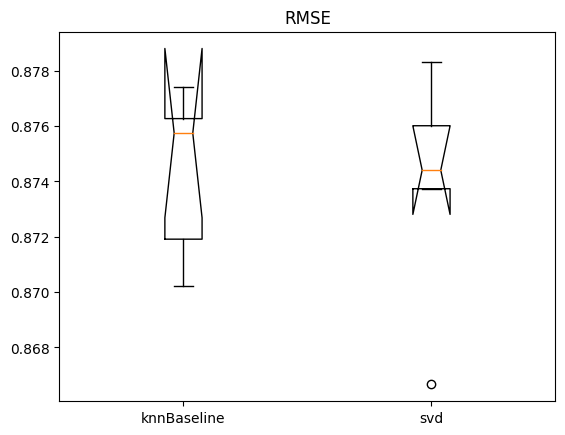

In [70]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
axs.boxplot((knn_result['test_rmse'], svd_result['test_rmse']), notch=True, labels=["knnBaseline", "svd"])
axs.set_title('RMSE')
plt.show()

#### Computing the 15 best recommendations you can get for each system.

In [71]:
trainset = data.build_full_trainset()
knnBaseline.fit(trainset)
svd.fit(trainset)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [74]:
knn_recommendation = []

for movieId in movies['movieId'].values:
    rating = knnBaseline.predict(uid=611, iid=movieId)
    title = movies[movies['movieId']==movieId]['title'].values[0]
    genres = movies[movies['movieId']==movieId]['genres'].values[0]
    knn_recommendation.append([movieId, rating.est, title, genres])

knn_recommendation =  pd.DataFrame(data=knn_recommendation, columns=['movieId', 'rating', 'title', 'genres'])
knn_recommendation.sort_values('rating', ascending=False, inplace=True)
knn_recommendation.head()

,movieId,rating,title,genres
4871,7301,5.0,Diary of a Country Priest (Journal d'un curé d...,Drama
7601,86721,5.0,Idiots and Angels (2008),Animation|Drama|Fantasy
3068,4117,5.0,Hope and Glory (1987),Drama
7621,87234,5.0,Submarine (2010),Comedy|Drama|Romance
2977,3989,5.0,One Day in September (1999),Documentary


In [75]:
svd_recommendation = []

for movieId in movies['movieId'].values:
    rating = svd.predict(uid=611, iid=movieId)
    title = movies[movies['movieId']==movieId]['title'].values[0]
    genres = movies[movies['movieId']==movieId]['genres'].values[0]
    svd_recommendation.append([movieId, rating.est, title, genres])

svd_recommendation =  pd.DataFrame(data=svd_recommendation, columns=['movieId', 'rating', 'title', 'genres'])
svd_recommendation.sort_values('rating', ascending=False, inplace=True)
svd_recommendation.head()

,movieId,rating,title,genres
686,904,4.979376,Rear Window (1954),Mystery|Thriller
277,318,4.919244,"Shawshank Redemption, The (1994)",Crime|Drama
2462,3275,4.890990,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller
690,908,4.863160,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller
5885,33166,4.862977,Crash (2004),Crime|Drama


In [76]:
personnal_rating_df = pd.merge(personnal_rating_df, movies, how="inner", on="movieId").sort_values("rating")
print(personnal_rating_df.shape)
personnal_rating_df.head()

(17, 5)


,userId,movieId,rating,title,genres
8,611,122898,2.5,Justice League (2017),Action|Adventure|Sci_Fi
14,611,122916,3.0,Thor: Ragnarok (2017),Action|Adventure|Sci_Fi
9,611,122900,3.0,Ant-Man (2015),Action|Adventure|Sci_Fi
15,611,122918,3.0,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci_Fi
10,611,122902,3.5,Fantastic Four (2015),Action|Adventure|Fantasy|Sci_Fi


In [77]:
personnal_count = pd.merge(count_matrix_df, personnal_rating_df[['movieId', 'rating']], how="inner", on="movieId")
personnal_count.head()

,movieId,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,...,imax,musical,mystery,no_listed,romance,sci_fi,thriller,war,western,rating
0,59501,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.0
1,82169,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.0
2,91500,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,5.0
3,106487,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,5.0
4,108190,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,5.0


In [78]:
weighting_profile = personnal_count['rating'] @ personnal_count.loc[:,~personnal_count.columns.isin(['movieId', 'rating'])]
weighting_profile.head()

action       46.0
adventure    65.5
animation     0.0
children     10.0
comedy        4.0
Name: rating, dtype: float64

In [79]:
weighting_profile = weighting_profile / sum(weighting_profile)

print(weighting_profile.sort_values(ascending=False))
print(weighting_profile.sum())

adventure      0.284165
sci_fi         0.255965
action         0.199566
fantasy        0.058568
thriller       0.054230
children       0.043384
imax           0.043384
drama          0.021692
romance        0.021692
comedy         0.017354
mystery        0.000000
war            0.000000
no_listed      0.000000
horror         0.000000
musical        0.000000
film_noir      0.000000
documentary    0.000000
crime          0.000000
animation      0.000000
western        0.000000
Name: rating, dtype: float64
1.0


In [80]:
weighting_movies = count_matrix_df @ weighting_profile.T
weighting_movies.head()

movieId
1    0.403471
2    0.386117
3    0.039046
4    0.060738
5    0.017354
dtype: float64

In [81]:
weighting_movies = weighting_movies * 4.5 + 0.5

print(weighting_movies.sort_values(ascending=False))
print(weighting_movies.sum())

movieId
71999     4.531453
164226    4.414317
546       4.365510
85261     4.297180
103042    4.287419
            ...   
2651      0.500000
2652      0.500000
1284      0.500000
5059      0.500000
3294      0.500000
Length: 9742, dtype: float64
10959.275488069416


In [82]:
weighting_movies = weighting_movies.to_frame()

In [85]:
prediction = pd.merge(weighting_movies, personnal_rating_df, how="inner", on="movieId")
prediction

,movieId,0,userId,rating,title,genres
0,59501,2.237527,611,5.0,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy
1,82169,2.237527,611,5.0,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy
2,91500,4.170282,611,5.0,The Hunger Games (2012),Action|Adventure|Drama|Sci_Fi|Thriller
3,106487,4.023861,611,5.0,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci_Fi|IMAX
4,108190,3.223427,611,5.0,Divergent (2014),Adventure|Romance|Sci_Fi|IMAX
5,116823,3.174620,611,4.0,The Hunger Games: Mockingjay - Part 1 (2014),Adventure|Sci_Fi|Thriller
6,122892,3.828633,611,4.0,Avengers: Age of Ultron (2015),Action|Adventure|Sci_Fi
7,122898,3.828633,611,2.5,Justice League (2017),Action|Adventure|Sci_Fi
8,122900,3.828633,611,3.0,Ant-Man (2015),Action|Adventure|Sci_Fi
9,122902,4.092191,611,3.5,Fantastic Four (2015),Action|Adventure|Fantasy|Sci_Fi


In [86]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(prediction[0], prediction['rating'])
print(sqrt(mse))

1.2929718912860575


In [87]:
X = personnal_count.loc[:,~personnal_count.columns.isin(['movieId', 'rating'])]
y = personnal_count['rating']

print(X.shape)
print(y.shape)

(17, 20)
(17,)


In [88]:
from sklearn import tree

my_tree = tree.DecisionTreeRegressor(max_depth=5)
my_tree.fit(X, y)

DecisionTreeRegressor(max_depth=5)

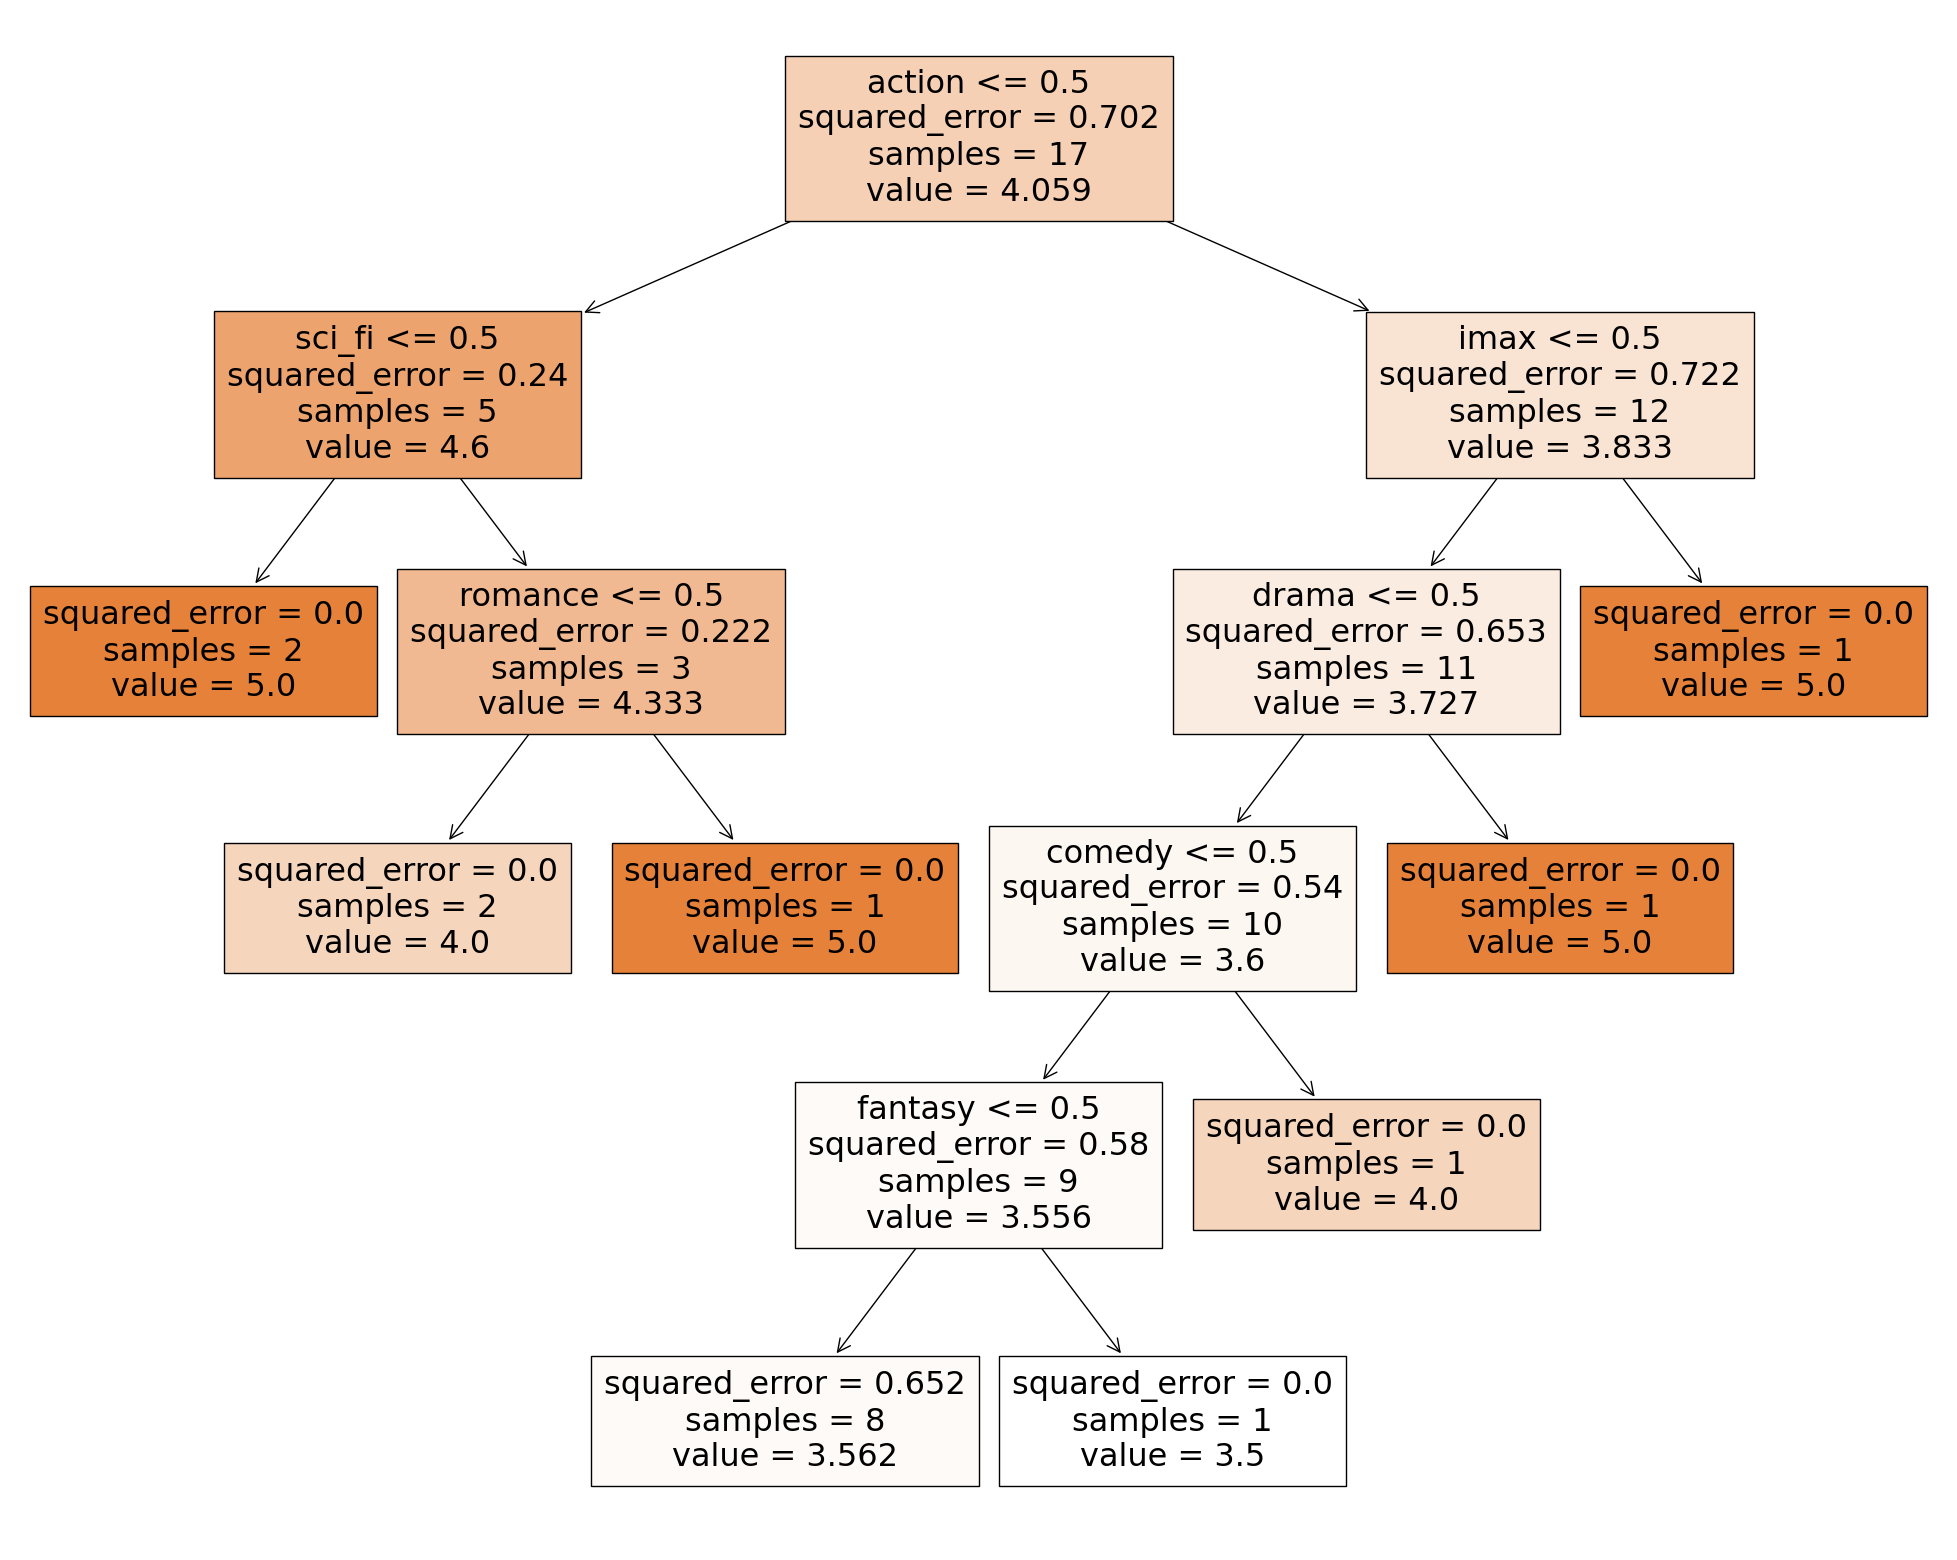

In [89]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(my_tree,
                   feature_names=X.columns,
                   filled=True)

In [90]:
my_tree.score(X, y)

0.5629618226600985

In [91]:
prediction = my_tree.predict(X)

In [92]:
rmse = mean_squared_error(prediction, y)
rmse

0.3069852941176471

In [94]:
l = list(set(count_matrix_df.index) - set(personnal_rating_df['rating'].index)) # indexes of unrated titems
count_matrix_df_unrated = count_matrix_df.loc[l]
print(count_matrix_df_unrated.shape)
count_matrix_df_unrated.head()

(9726, 20)


,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,imax,musical,mystery,no_listed,romance,sci_fi,thriller,war,western
movieId,,,,,,,,,,,,,,,,,,,,
17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
21,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [95]:
predictions = pd.Series(my_tree.predict(count_matrix_df_unrated))
predictions.index = count_matrix_df_unrated.index
print(predictions.head())

movieId
17    5.0
18    5.0
19    5.0
20    5.0
21    5.0
dtype: float64


In [96]:
# Sorting of the predicted ratings in order to extract recommendations:
v = predictions.value_counts()
print(v.sort_index(ascending=False))
print(personnal_count.shape)

5.0000    8024
4.0000     854
3.5625     720
3.5000     128
dtype: int64
(17, 22)


In [97]:
moviesId_best_reco = predictions.loc[predictions == 5].index
best_reco = movies[movies['movieId'].isin(moviesId_best_reco)]
print(best_reco)

      movieId                                     title  \
16         17              Sense and Sensibility (1995)   
17         18                         Four Rooms (1995)   
18         19     Ace Ventura: When Nature Calls (1995)   
19         20                        Money Train (1995)   
20         21                         Get Shorty (1995)   
...       ...                                       ...   
9735   193573   Love Live! The School Idol Movie (2015)   
9736   193579  Jon Stewart Has Left the Building (2015)   
9738   193583              No Game No Life: Zero (2017)   
9739   193585                              Flint (2017)   
9741   193609       Andrew Dice Clay: Dice Rules (1991)   

                                  genres  
16                         Drama|Romance  
17                                Comedy  
18                                Comedy  
19    Action|Comedy|Crime|Drama|Thriller  
20                 Comedy|Crime|Thriller  
...                              